In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df= pd.read_csv('Chocolate Sales (2).csv')

In [4]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [5]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',', '')

In [6]:
df['Amount'] = df['Amount'].astype(float)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   3282 non-null   object 
 1   Country        3282 non-null   object 
 2   Product        3282 non-null   object 
 3   Date           3282 non-null   object 
 4   Amount         3282 non-null   float64
 5   Boxes Shipped  3282 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 154.0+ KB
None


In [8]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,13685.0,184


In [9]:
df['Date']= pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [10]:
df=df.drop('Date',axis=1)

In [11]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Month,Year
0,Jehu Rudeforth,UK,Mint Chip Choco,5320.0,180,1,2022
1,Van Tuxwell,India,85% Dark Bars,7896.0,94,8,2022
2,Gigi Bohling,India,Peanut Butter Cubes,4501.0,91,7,2022
3,Jan Morforth,Australia,Peanut Butter Cubes,12726.0,342,4,2022
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685.0,184,2,2022


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   3282 non-null   object 
 1   Country        3282 non-null   object 
 2   Product        3282 non-null   object 
 3   Amount         3282 non-null   float64
 4   Boxes Shipped  3282 non-null   int64  
 5   Month          3282 non-null   int32  
 6   Year           3282 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 154.0+ KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_5008\295344575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')


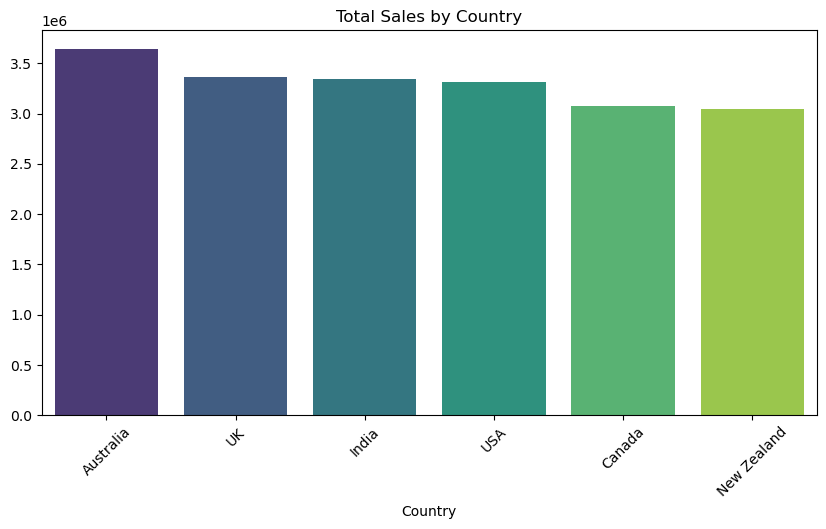

In [14]:
plt.figure(figsize=(10,5))
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')
plt.title('Total Sales by Country')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5008\1718744718.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Amount', estimator='sum', ci=None, marker='o')


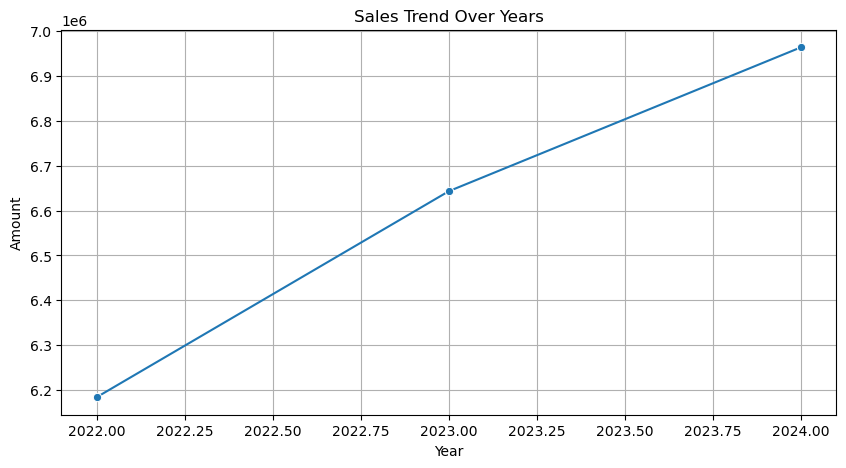

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Amount', estimator='sum', ci=None, marker='o')
plt.title('Sales Trend Over Years')
plt.grid(True)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['Sales Person', 'Country', 'Product']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Month,Year
0,13,4,14,5320.0,180,1,2022
1,23,2,2,7896.0,94,8,2022
2,9,2,17,4501.0,91,7,2022
3,12,0,17,12726.0,342,4,2022
4,13,4,17,13685.0,184,2,2022


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Amount', axis=1)

y = df['Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2625, 6)
Testing set size: (657, 6)


In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

print("Regression Model Training Complete!")

Regression Model Training Complete!


In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}")

Mean Absolute Error: $1929.16
R2 Score (Accuracy): 0.62


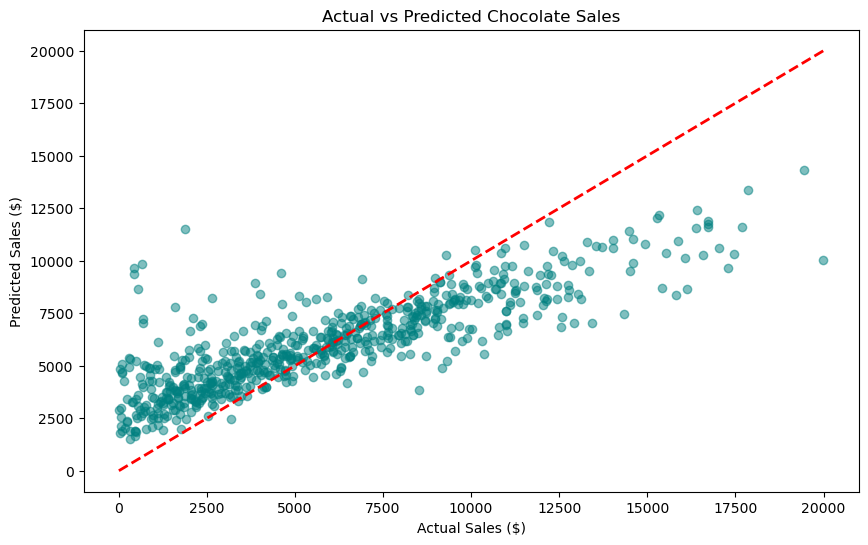

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.title('Actual vs Predicted Chocolate Sales')
plt.show()

In [28]:
"""1. Correlation Matrix calculate karna """

'1. Correlation Matrix calculate karna '

In [29]:
correlation_matrix = df.corr()

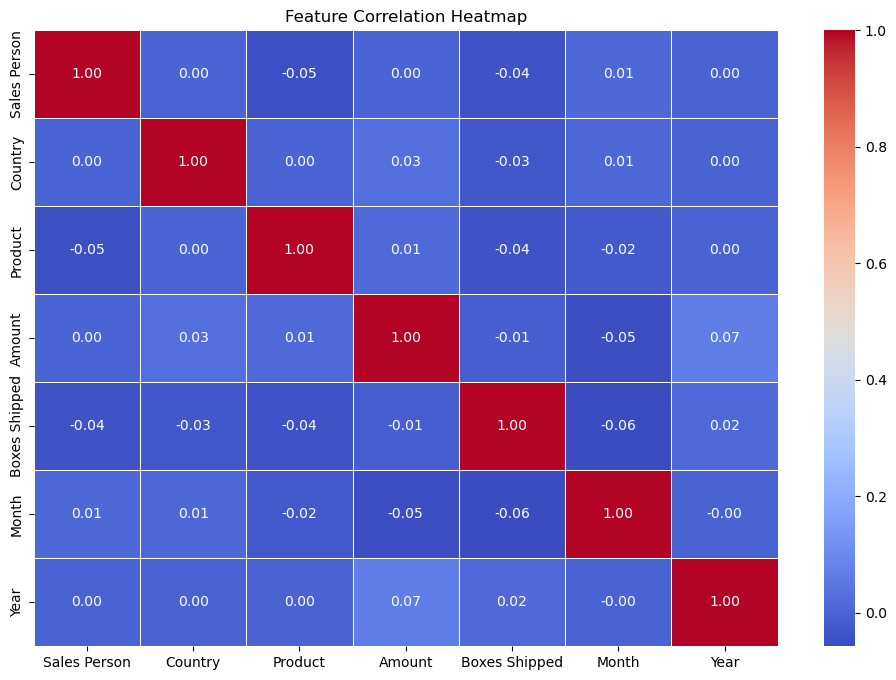

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [35]:
import pickle

In [38]:
with open('chocolate_sales_model.pkl', 'wb') as file: pickle.dump(model, file)

In [39]:
with open ('label_encoder.pkl', 'wb' ) as file: pickle.dump(le , file)

In [40]:
print("Model and Encoder saved successfully!")

Model and Encoder saved successfully!


In [42]:
with open('chocolate_sales_model.pkl', 'rb' ) as file: loaded_model = pickle.load(file)